In [1]:
import abacus_cosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
halo_data = ach.read_halos_FoF("../data/AbacusCosmos_1100box_00_FoF_halos_z0.300/")

In [4]:
halo_table = Table(halo_data)

In [5]:
halo_table[0:1]

id,subsamp_start,subsamp_len,N,subhalo_N [4],pos [3],vel [3],sigma_v [3],r25,r50,r75,r90,vcirc_max,rvcirc_max,subhalo_pos [3],subhalo_vel [3],subhalo_sigma_v [3],subhalo_r25,subhalo_r50,subhalo_r75,subhalo_r90,subhalo_vcirc_max,subhalo_rvcirc_max
int64,uint64,uint32,uint32,uint32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
33242377525485,0,2701,27838,10581 .. 586,-498.60577 .. 409.212,184.10143 .. -221.06378,1103.6188 .. 784.6088,1.6821681,2.0619814,2.773661,3.4043431,1268.671,2.4715793,-499.46762 .. 409.26157,314.42062 .. -41.576843,1304.2107 .. 787.263,0.7284749,1.6034807,4.082432,5.2991858,1444.855,1.0359467


In [6]:
sigma_v = halo_data['vcirc_max']

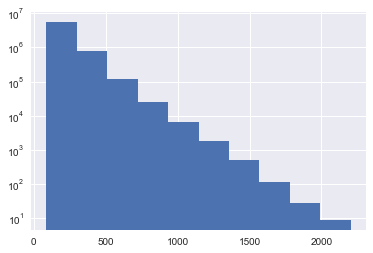

In [7]:
_ = plt.hist(sigma_v, log=True)

In [8]:
np.count_nonzero(sigma_v>500)

162914

In [9]:
pos = halo_data['pos']

(0, 200)

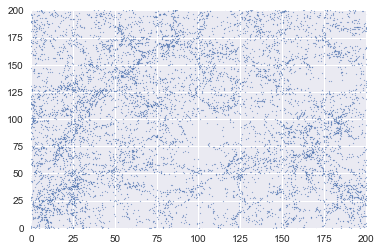

In [18]:
ii = (sigma_v>50) & (pos[:,2]>500)
plt.scatter(pos[ii,0], pos[ii,1], alpha=0.5, s=1.0)
plt.xlim([0,200])
plt.ylim([0,200])

In [54]:
delta_center = 200
radius = 100
for center_i in [-1,0,1]:
    for center_j in [-1,0,1]:
        for center_k in [-1,0,1]:
            center_x = center_i * delta_center
            center_y = center_j * delta_center
            center_z = center_k * delta_center
            r = np.sqrt((pos[:,0]-center_x)**2 + (pos[:,1]-center_y)**2 + (pos[:,2]-center_z)**2)
            ll = (r>radius) & (r<radius+10)
            pos_shell = pos[ll]
            print(center_i, center_j, center_k, len(pos_shell))

-1 -1 -1 6298
-1 -1 0 7206
-1 -1 1 6677
-1 0 -1 6589
-1 0 0 6196
-1 0 1 6877
-1 1 -1 5870
-1 1 0 7060
-1 1 1 6359
0 -1 -1 7027
0 -1 0 6446
0 -1 1 6258
0 0 -1 6846
0 0 0 6856
0 0 1 7205
0 1 -1 6732
0 1 0 6507
0 1 1 6226
1 -1 -1 7053
1 -1 0 6124
1 -1 1 6371
1 0 -1 6931
1 0 0 6660
1 0 1 6571
1 1 -1 6961
1 1 0 6875
1 1 1 6203


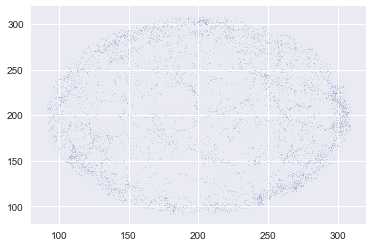

In [55]:
plt.scatter(pos_shell[:,0], pos_shell[:,1], alpha=0.5, s=0.1)

In [56]:
np.savetxt("shell_data.dat", pos_shell)

In [61]:
!wc -l beta_1.1.dat
!wc -l beta_1.2.dat
!wc -l beta_1.4.dat

   24930 beta_1.1.dat
   22974 beta_1.2.dat
   19894 beta_1.4.dat


In [155]:
def entropy_beta_file(filename):
    # remove duplicates
    beta_data = np.sort(np.int_(np.loadtxt(filename)))
    #print(len(beta_data))
    beta_data  = np.unique(beta_data, axis=0)
    beta_data = beta_data.flatten()
    #print(len(beta_data))
    beta_link_count = Counter(Counter(beta_data).values())

    proba = []
    total_link = np.sum(list(beta_link_count.values()))
    for k in beta_link_count:
        #print(k)
        proba.append(beta_link_count[k]/total_link)
    proba = np.array(proba)
    entropy = np.sum(-proba*np.log(proba))
    return entropy

# remove duplicates
entropy = []
for i_d in range(1,10):
    filename = 'beta_1.{}.dat'.format(i_d)
    entropy.append(entropy_beta_file(filename))

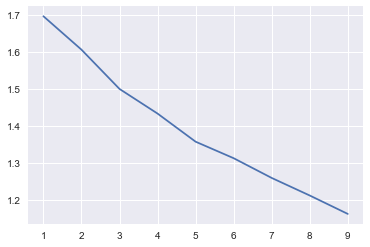

In [156]:
plt.plot(range(1,10), entropy)

6203

In [66]:
beta_data = np.int_(np.loadtxt('beta_1.1.dat').flatten())

In [68]:
len(beta_data)

49860

In [70]:
from collections import Counter

Counter({2: 32,
         4: 665,
         6: 1719,
         8: 1823,
         10: 1113,
         12: 544,
         14: 206,
         16: 71,
         18: 20,
         20: 10})

In [73]:
Counter(beta_data)

Counter({0: 10,
         1624: 8,
         1417: 6,
         1085: 8,
         977: 10,
         592: 14,
         1: 10,
         972: 8,
         1194: 8,
         190: 8,
         638: 8,
         519: 12,
         2: 6,
         1362: 8,
         1798: 10,
         102: 6,
         3: 12,
         1375: 10,
         713: 8,
         1145: 12,
         1297: 12,
         52: 6,
         104: 8,
         4: 8,
         809: 10,
         1189: 8,
         478: 8,
         91: 8,
         5: 4,
         1524: 8,
         1383: 14,
         6: 10,
         1730: 6,
         1803: 8,
         501: 14,
         1164: 12,
         719: 16,
         7: 8,
         330: 6,
         1143: 6,
         802: 12,
         735: 16,
         8: 8,
         1425: 6,
         467: 8,
         17: 8,
         593: 10,
         9: 12,
         1039: 10,
         1676: 8,
         1201: 8,
         413: 12,
         759: 8,
         1331: 10,
         10: 6,
         805: 6,
         874: 10,
         7